In [1]:
from src.Sonufy import *
from src.AudioDataGenerator import AudioDataGenerator
import matplotlib.pyplot as plt

In [360]:
adg = AudioDataGenerator(batch_size=32, input_size=(64,1030), output_size=(64,64), directory='data/mels', shorten_factor=2)

Found 67361 files for prediction set


In [361]:
sonufy = Sonufy(latent_dims=128, output_size=(64,64), final_shorten_factor=2)

In [379]:
sonufy.build_model(filters=(16,32,64))

In [381]:
sonufy.train(mel_directory='data/mels', epochs=50, train_test_split=.02, batch_size=128)

Found 66013 files for training set
Found 1348 files for testing set
Epoch 1/50
515/515 [==============================] - 140s 272ms/step - loss: 0.0087 - val_loss: 0.0072
Epoch 2/50
515/515 [==============================] - 132s 256ms/step - loss: 0.0066 - val_loss: 0.0064
Epoch 3/50
515/515 [==============================] - 127s 246ms/step - loss: 0.0060 - val_loss: 0.0062
Epoch 4/50
515/515 [==============================] - 144s 279ms/step - loss: 0.0057 - val_loss: 0.0054
Epoch 5/50
515/515 [==============================] - 153s 297ms/step - loss: 0.0054 - val_loss: 0.0053
Epoch 6/50
515/515 [==============================] - 134s 260ms/step - loss: 0.0052 - val_loss: 0.0051
Epoch 7/50
515/515 [==============================] - 141s 273ms/step - loss: 0.0051 - val_loss: 0.0049
Epoch 8/50
515/515 [==============================] - 144s 280ms/step - loss: 0.0049 - val_loss: 0.0051
Epoch 9/50
515/515 [==============================] - 131s 254ms/step - loss: 0.0048 - val_loss: 0.0

In [ ]:
sonufy.save_encoder('data/test_128dim_newmels')
# sonufy.load_encoder('data/test_128dim_newmels')
sonufy.build_vectors_from_model(mel_directory='data/mels', all_tracks_file='data/all_tracks_shuffled.feather')
sonufy.save('data/test_128dim_newmels')

2022-09-07 08:29:25.998 WARNING absl: Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 5 of 6). These functions will not be directly callable after loading.
2022-09-07 08:29:26.432 INFO    tensorflow: Assets written to: /var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/tmp2mzda8ya/assets
2022-09-07 08:29:27.951174: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-09-07 08:29:27.951451: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-09-07 08:29:27.953408: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/tmp2mzda8ya
2022-09-07 08:29:27.964225: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2022-09-07 08:29:27.964243: I tens

Encoder saved to "data/test_128dim_newmels".
Getting predictions from autoencoder...


INFO: Applying 1 TensorFlow Lite delegate(s) lazily.


In [365]:
sonufy.load('data/test_128dim_newmels/')

Autoencoder loaded from "data/test_128dim_newmels/".
loaded full model
loaded encoder
Loaded tracks.
Loaded genres.
loaded scaler
loaded database files


In [366]:
test_img = adg.take(6)[0]
test_img2 = adg.take(0)[0]

Two separate images taken from different tracks:

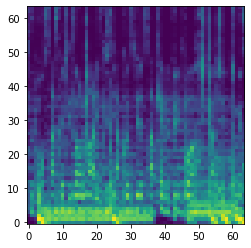

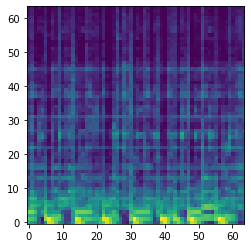

In [367]:
plt.imshow(test_img[0], origin='lower')
plt.show()
plt.imshow(test_img2[0], origin='lower')
plt.show()

Autoencoder predictions for those images.

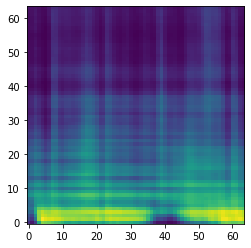

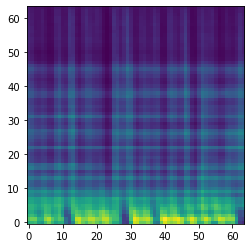

In [368]:
plt.imshow(sonufy.autoencoder(test_img)[0], origin='lower')
plt.show()
plt.imshow(sonufy.autoencoder(test_img2)[0], origin='lower')
plt.show()

Distribution comparison between two images.

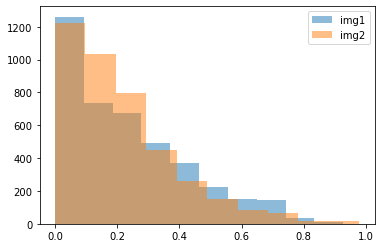

In [369]:
plt.hist(np.array(test_img[0]).reshape(-1), alpha=0.5, label='img1')
plt.hist(np.array(test_img2[0]).reshape(-1), alpha=0.5, label='img2')
plt.legend()
plt.show()

Distribution comparision between one image and the prediction.

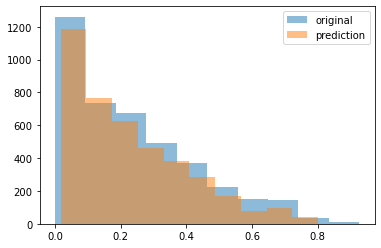

In [370]:
plt.hist(np.array(test_img[0]).reshape(-1), alpha=0.5, label='original')
plt.hist(np.array(sonufy.autoencoder(test_img)[0]).reshape(-1), alpha=0.5, label='prediction')
plt.legend()
plt.show()

comparison between encoded original and encoded prediction

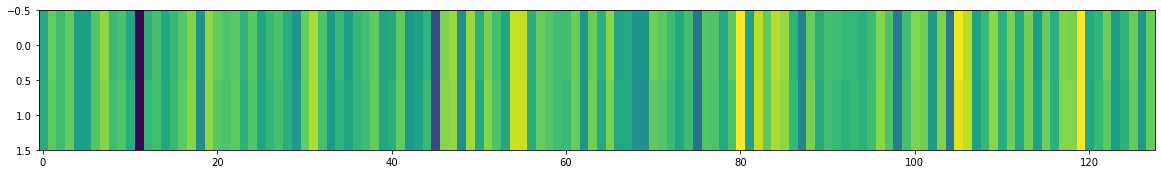

In [371]:
concat_img = np.array([sonufy.autoencoder.encoder(sonufy.autoencoder(test_img))[0], sonufy.autoencoder.encoder(test_img)[0]])
plt.figure(figsize=(20,5))
plt.imshow(concat_img, aspect=8)

compare encoded between two images

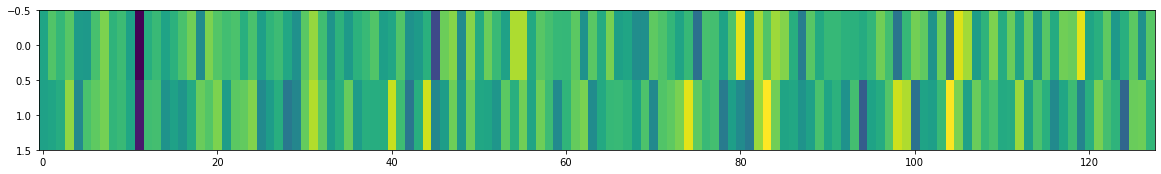

In [372]:
concat_img_compare = np.array([sonufy.autoencoder.encoder(sonufy.autoencoder(test_img))[0], sonufy.autoencoder.encoder(sonufy.autoencoder(test_img2))[0]])
plt.figure(figsize=(20,5))
plt.imshow(concat_img_compare, aspect=8)

compare encoded between two images and the mean of the first image batch.

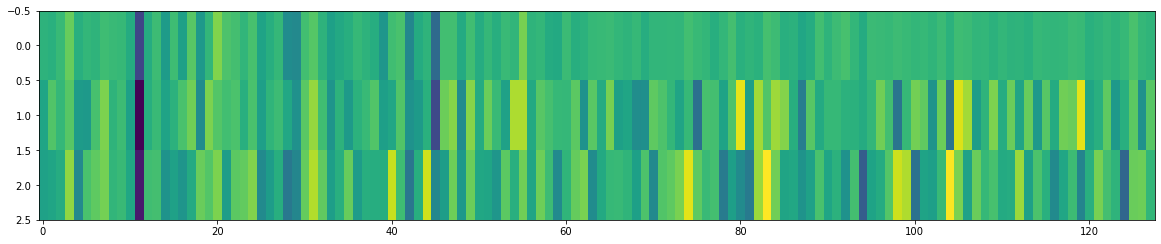

In [373]:
concat_img_compare = np.array([np.array(sonufy.autoencoder.encoder(sonufy.autoencoder(test_img))).mean(axis=0), sonufy.autoencoder.encoder(sonufy.autoencoder(test_img))[0], sonufy.autoencoder.encoder(sonufy.autoencoder(test_img2))[0]])
plt.figure(figsize=(20,5))
plt.imshow(concat_img_compare, aspect=8)

Look at the scale of each feature in the encoded space. Needs to be scaled which is what is happening later on.

In [374]:
pd.Series(np.array(sonufy.autoencoder.encoder(test_img)[0]).reshape(-1))

0     -2.159883
1      2.124318
2      0.064922
3      2.451025
4     -3.938225
         ...   
123   -4.000001
124   -1.224287
125    2.302783
126   -4.562623
127    2.428912
Length: 128, dtype: float32

In [375]:
concat_img_compare[0].shape

(128,)

heat map cosine similarity between encoded images for entire batch vs batch

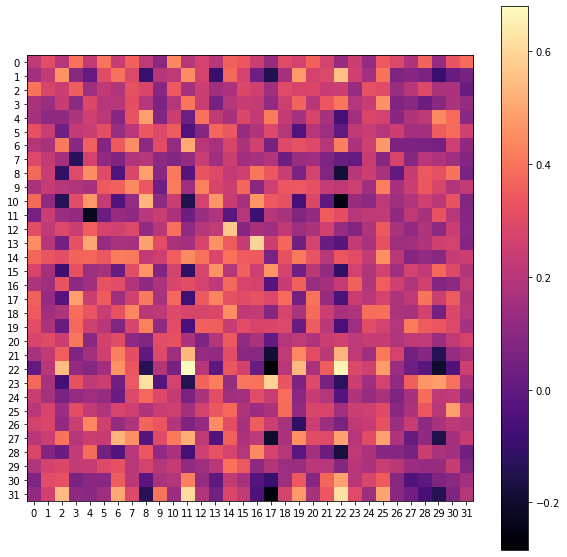

In [376]:
from sklearn.metrics.pairwise import cosine_similarity

plt.figure(figsize=(10,10))
plt.imshow(cosine_similarity(sonufy.autoencoder.encoder(test_img), sonufy.autoencoder.encoder(test_img2)), cmap='magma')
plt.xticks(ticks=range(32))
plt.yticks(ticks=range(32))
plt.colorbar()
plt.show()

cosine similarity between mean and the entire batch of the second image.

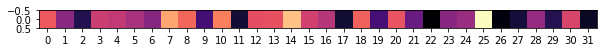

In [377]:
plt.figure(figsize=(10,10))
plt.imshow(cosine_similarity(np.array(sonufy.autoencoder.encoder(test_img)).mean(axis=0).reshape(1,-1), sonufy.autoencoder.encoder(test_img2)), cmap='magma')
plt.xticks(ticks=range(32))
plt.show()

cosine similarity between encoded space of the mean of the two images.

In [378]:
cosine_similarity(np.array(sonufy.autoencoder.encoder(test_img)).mean(axis=0).reshape(1,-1), np.array(sonufy.autoencoder.encoder(test_img2)).mean(axis=0).reshape(1,-1))


array([[0.91384816]], dtype=float32)

In [261]:
a, b, c, d = sonufy.search_for_recommendations(query='beautiful and dangerous desmond dekker', get_time_and_freq=True)

/Users/michaelroth/miniforge3/envs/golden_env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [116]:
a['name']

'Beautiful and Dangerous'

In [117]:
b

,track_name,track_uri,artist_name,similarity,track_popularity,time_similarity,frequency_similarity
0,EAST CROYDON feat. James Maddren,spotify:track:350BnjEWhEBFeY5djjWmXq,Petter Eldh,0.521634,27,0.596679,0.503324
1,Southland,spotify:track:7Ib06lFizxlVPznTItb8Ca,Lindsay Lou,0.519166,39,0.720778,0.441406
2,Almost Fantasy,spotify:track:5lOuVGcqKeyc80RaIRs0p8,Fog Lake,0.507706,39,0.554174,0.494673
3,Mississippi Steamboat,spotify:track:26IxTOzwgq8Xpe1tPJw1lR,Ekoostik Hookah,0.506959,20,0.641059,0.460866
4,Kaçıyorum (feat. Gaye Su Akyol),spotify:track:3yT7bm0SdnRluI4cxHPEe7,Debruit,0.496249,22,0.492604,0.504138
5,Drumming In Africa - Soukouss,spotify:track:5Z0Hpt4RL2o6JlCsE94kG4,Soukouss Ta: African Drums and Music,0.495554,12,0.620575,0.452950
6,Part 3,spotify:track:14o3h5jwg5U3Wa3mY7dOx9,Douglas Holmquist,0.494404,21,0.558606,0.472491
7,Back in the Goodle Days,spotify:track:0B6BeEUd6UwFlbsHMQKjob,John Hartford,0.492001,43,0.596071,0.456061
8,The House of the Rising Sun,spotify:track:22UqKaSfXbivrK2PDQzNJk,Pozo Seco Singers,0.474109,19,0.663367,0.399176
9,Life's A Little Blue,spotify:track:3Rayx79t9q4nTO2xzdO8IE,Booker Little,0.473242,16,0.683665,0.383972


In [118]:
similarity_img = np.concatenate([np.array(d), np.array(c[sonufy.latent_cols])])

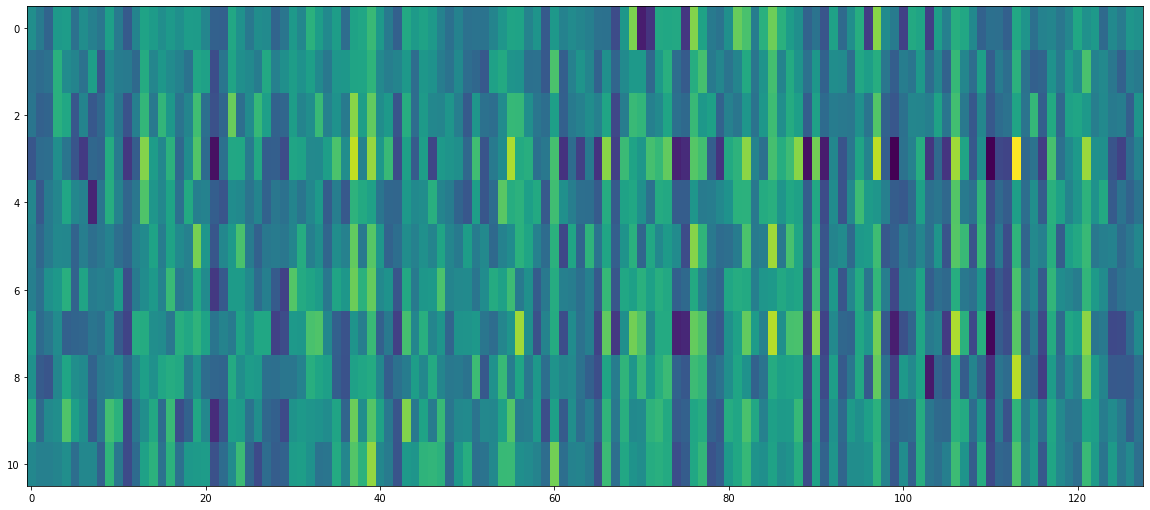

In [119]:
plt.figure(figsize=(20,10))
plt.imshow(similarity_img, aspect=5)

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [71]:
mean_squared_error(test_img[0].reshape(64,64), np.array(sonufy.autoencoder(test_img)[0]).reshape(64,64))

0.008464583422193032